In [34]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

In [35]:
# read data
file_path = Path("crypto_data.csv")
crypto_data = pd.read_csv(file_path)
crypto_data.shape


(1252, 7)

In [36]:
crypto_data=crypto_data.dropna()
len(crypto_data)
crypto_data.head()
crypto_data.value_counts()

Unnamed: 0  CoinName     Algorithm    IsTrading  ProofType  TotalCoinsMined  TotalCoinSupply
1337        EliteCoin    X13          True       PoW/PoS    2.927942e+10     314159265359       1
POKER       PokerCoin    Scrypt       False      PoS/PoW    0.000000e+00     466666667          1
PKB         ParkByte     SHA-256      True       PoW/PoS    0.000000e+00     25000000           1
PLNC        PLNCoin      Scrypt       True       PoW/PoS    1.708960e+07     38540000           1
PLTC        PlatinCoin   CryptoNight  True       PoW        8.430000e+04     600000518          1
                                                                                               ..
FAIR        FairCoin     Groestl      True       PoW/PoS    5.319383e+07     0                  1
FC2         Fuel2Coin    X11          True       PoS        0.000000e+00     100000000          1
FCN         FantomCoin   CryptoNight  True       PoW        0.000000e+00     18400000           1
FIBRE       FIBRE        

In [37]:
# is_2002 =  gapminder['year']==2002
# print(is_2002.head())

isTrading=crypto_data['IsTrading']==True
print(isTrading)

0        True
2        True
4        True
5        True
7        True
        ...  
1242     True
1245     True
1246     True
1247     True
1248    False
Name: IsTrading, Length: 744, dtype: bool


In [38]:
crypto_data_cleaned = crypto_data[isTrading]
crypto_data_cleaned.head()
crypto_data_cleaned.shape

(685, 7)

In [39]:
# DROP COLUMN "IsTrading"
crypto_data_cleaned = crypto_data_cleaned.drop('IsTrading', axis = 1)
crypto_data_cleaned.shape

(685, 6)

In [40]:
crypto_data_cleaned=crypto_data_cleaned.query('TotalCoinsMined > 0')
crypto_data_cleaned.shape

(532, 6)

In [41]:
crypto_data_cleaned = crypto_data_cleaned.drop('CoinName', axis=1)
crypto_data_cleaned = crypto_data_cleaned.drop('Unnamed: 0', axis=1)

print(crypto_data_cleaned.shape)
crypto_data_cleaned.dtypes

(532, 4)


Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [42]:
# crypto_data_cleaned = crypto_data_cleaned.astype({'TotalCoinSupply':float}).astype({'TotalCoinSupply':int})
crypto_data_cleaned = crypto_data_cleaned.astype({'TotalCoinSupply':float})
crypto_data_cleaned.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [43]:
# Convert categorical data to numeric and separate target feature for training data
# pd.get_dummies(df, prefix=['A', 'D'], columns=['A', 'D'])
crypto_data_cleaned_dummies = pd.get_dummies(crypto_data_cleaned, prefix=['Algorithm','ProofType'], columns=['Algorithm','ProofType'])
print(crypto_data_cleaned_dummies.columns)
crypto_data_cleaned_dummies


Index(['TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algor

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Standarize data with StandarScaler
crypto_scaled = StandardScaler().fit_transform(crypto_data_cleaned_dummies)


In [45]:
# Applying PCA to reduce dimensions 90%

# Initialize PCA model
pca = PCA(n_components=.90)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca.shape

(532, 74)

In [46]:
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(
    data=crypto_pca)
df_crypto_pca.shape

(532, 74)

In [47]:
# Fetch the explained variance
pca.explained_variance_ratio_


array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [48]:
sum(pca.explained_variance_ratio_)

0.9010870638268429

In [49]:

len(pca.explained_variance_ratio_)

74

In [50]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [51]:
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pca)

In [52]:
tsne_features.shape

(532, 2)

In [53]:
# Prepare to plot the dataset

# The first column of transformed features
crypto_data_cleaned_dummies['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_data_cleaned_dummies['y'] = tsne_features[:,1]

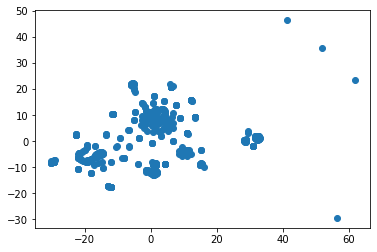

In [54]:
# Visualize the clusters
plt.scatter(crypto_data_cleaned_dummies['x'], crypto_data_cleaned_dummies['y'])
plt.show()

In [55]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,184175.953125
1,2,100691.250000
2,3,61457.070312
3,4,34446.765625
4,5,29364.308594


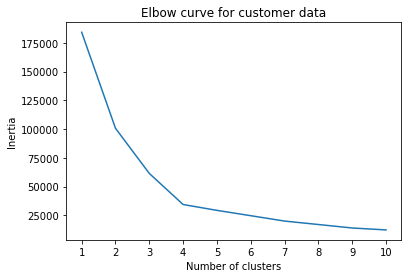

In [56]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [57]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [58]:
df_tsne_features = pd.DataFrame(data=tsne_features)
df_tsne_features.rename(columns = {0:'Reduction Feature 1', 1:'Reduction Feature 2'}, inplace = True)

In [59]:
clusters = get_clusters(3, df_tsne_features)

In [60]:
clusters

,Reduction Feature 1,Reduction Feature 2,class
0,-14.654418,-4.242408,1
1,-21.831221,-4.786376,1
2,-29.071472,-7.162664,1
3,32.437969,0.574111,2
4,13.358411,9.166694,0
...,...,...,...
527,29.637758,3.241266,2
528,-19.759441,-7.584271,1
529,-5.231397,21.628378,0
530,6.084895,20.743282,0


In [61]:
crypto = df_tsne_features

In [62]:
def show_clusters(df):
    plt.scatter(crypto['Reduction Feature 1'], df['Reduction Feature 2'], c=df['class'])
    plt.xlabel('TotalCoinsMined')
    plt.ylabel('TotalCoinSupply')
    plt.show()

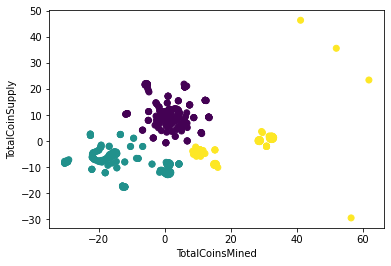

In [63]:
show_clusters(clusters)

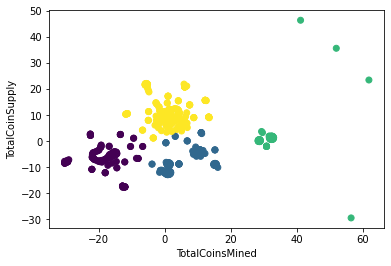

In [64]:
clusters = get_clusters(4, df_tsne_features)
show_clusters(clusters)

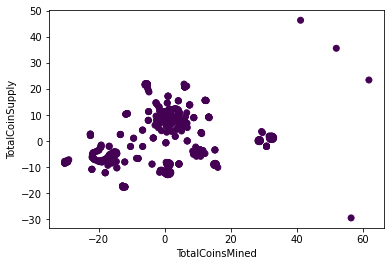

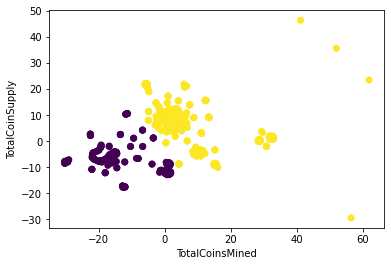

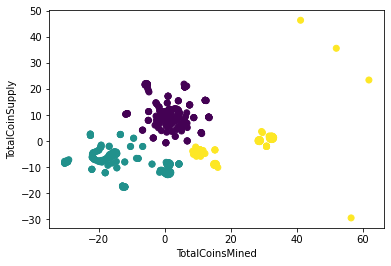

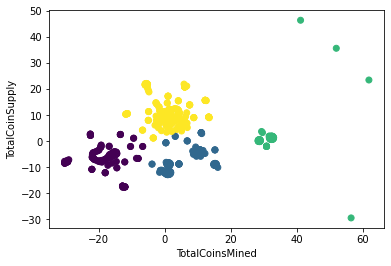

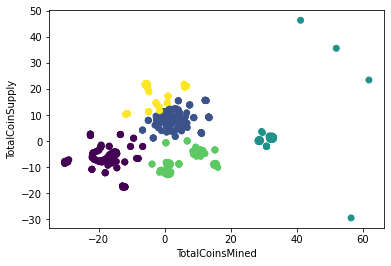

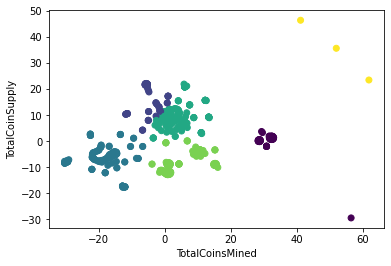

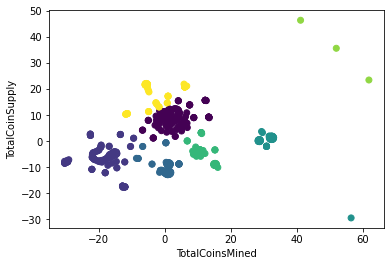

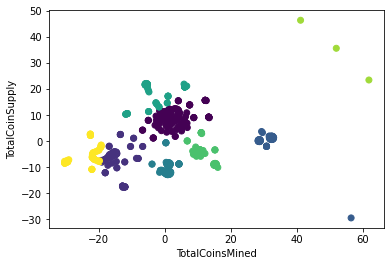

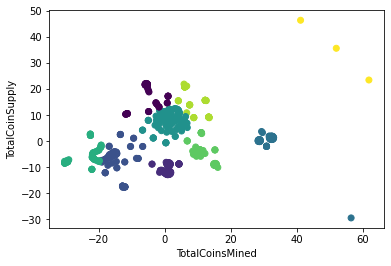

In [65]:
for k in range(1, 10):
    show_clusters(get_clusters(k, crypto))
